In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r"C:\Users\aashn\Downloads\advertising_data.csv")
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [3]:
df.shape

(200, 4)

In [4]:
df.describe

<bound method NDFrame.describe of         TV  Radio  Newspaper  Sales
0    230.1   37.8       69.2   22.1
1     44.5   39.3       45.1   10.4
2     17.2   45.9       69.3   12.0
3    151.5   41.3       58.5   16.5
4    180.8   10.8       58.4   17.9
..     ...    ...        ...    ...
195   38.2    3.7       13.8    7.6
196   94.2    4.9        8.1   14.0
197  177.0    9.3        6.4   14.8
198  283.6   42.0       66.2   25.5
199  232.1    8.6        8.7   18.4

[200 rows x 4 columns]>

In [5]:
df.info

<bound method DataFrame.info of         TV  Radio  Newspaper  Sales
0    230.1   37.8       69.2   22.1
1     44.5   39.3       45.1   10.4
2     17.2   45.9       69.3   12.0
3    151.5   41.3       58.5   16.5
4    180.8   10.8       58.4   17.9
..     ...    ...        ...    ...
195   38.2    3.7       13.8    7.6
196   94.2    4.9        8.1   14.0
197  177.0    9.3        6.4   14.8
198  283.6   42.0       66.2   25.5
199  232.1    8.6        8.7   18.4

[200 rows x 4 columns]>

In [6]:
df.tail(10)

,TV,Radio,Newspaper,Sales
190,39.5,41.1,5.8,10.8
191,75.5,10.8,6.0,11.9
192,17.2,4.1,31.6,5.9
193,166.8,42.0,3.6,19.6
194,149.7,35.6,6.0,17.3
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,18.4


In [7]:
df=df.replace(r'^\s*$', float(np.nan), regex=True)

In [8]:
df.tail()

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,18.4


In [9]:
missing_values = df.isnull().sum() #count the total number of nan value present.
missing_values

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [10]:
df.duplicated().value_counts()

False    200
Name: count, dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


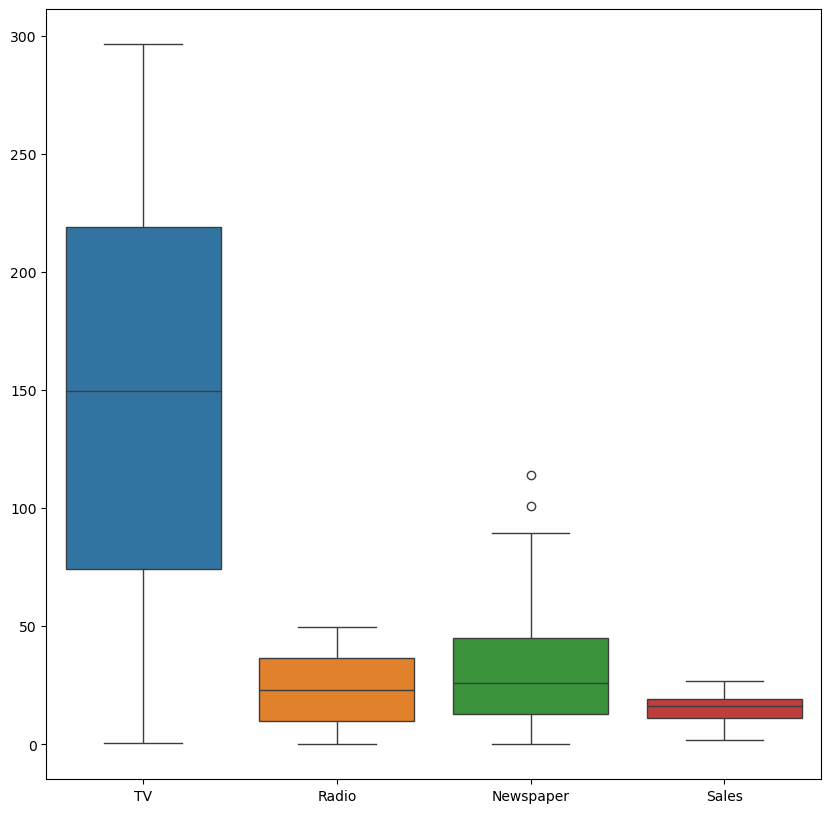

In [12]:
plt.figure(figsize=(10,10))
sns.boxplot(data=df)
plt.show()

In [14]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()
outliers

TV           0
Radio        0
Newspaper    2
Sales        0
dtype: int64

In [17]:
df = df[~((df < (Q1 - 1.5 * IQR)) | 
         (df > (Q3 + 1.5 * IQR))).any(axis=1)]


In [23]:
x = df[['TV', 'Radio', 'Newspaper']] 
x

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [24]:
y = df['Sales']
y

0      22.1
1      10.4
2      12.0
3      16.5
4      17.9
       ... 
195     7.6
196    14.0
197    14.8
198    25.5
199    18.4
Name: Sales, Length: 198, dtype: float64

In [28]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0)



In [29]:
x_train

,TV,Radio,Newspaper
141,193.7,35.4,75.6
81,239.8,4.1,36.9
20,218.4,27.7,53.4
161,85.7,35.8,49.3
91,28.6,1.5,33.0
...,...,...,...
68,237.4,27.5,11.0
194,149.7,35.6,6.0
119,19.4,16.0,22.3
48,227.2,15.8,49.9


In [30]:
y_train

141    19.2
81     17.3
20     18.0
161    13.3
91      7.3
       ... 
68     18.9
194    17.3
119     6.6
48     19.8
174    16.5
Name: Sales, Length: 138, dtype: float64

In [31]:
x_test

,TV,Radio,Newspaper
19,147.3,23.9,19.1
170,50.0,11.6,18.4
64,131.1,42.8,28.9
177,170.2,7.8,35.2
72,26.8,33.0,19.3
87,110.7,40.6,63.2
5,8.7,48.9,75.0
120,141.3,26.8,46.2
12,23.8,35.1,65.9
152,197.6,23.3,14.2


In [32]:
y_test

19     14.6
170     8.4
64     16.0
177    16.7
72      8.8
87     16.0
5       7.2
120    15.5
12      9.2
152    16.6
61     24.2
76      6.9
165    16.9
97     20.5
115    12.6
7      13.2
34     11.9
136     9.5
38     10.1
168    17.1
111    21.8
145    10.3
46     10.6
159    12.9
140    10.9
113    20.9
179    17.6
185    22.6
93     22.2
45     16.1
17     24.4
137    20.8
138     9.6
98     25.4
23     20.5
196    14.0
128    24.7
4      17.9
67     13.4
125    10.6
133    19.6
175    27.0
27     20.9
62     20.7
147    25.4
84     21.7
8       4.8
143    10.4
75      8.7
189     6.7
99     17.2
56      5.5
146    18.2
164    11.9
25     17.0
31     11.9
114    14.6
41     17.1
57     13.2
181    17.2
Name: Sales, dtype: float64

In [33]:
# data normalization with sklearn
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
# fit scaler on training data
x_train = sc.fit_transform(x_train)

# transform testing data
x_test = sc.transform(x_test)

In [34]:
x_train

array([[ 0.55443001,  0.8645325 ,  2.34796104],
       [ 1.0916911 , -1.25083695,  0.42016829],
       [ 0.84229007,  0.3441381 ,  1.24209543],
       [-0.70422939,  0.89156598,  1.03785899],
       [-1.36968728, -1.42655454,  0.2258946 ],
       [ 0.61503213,  1.81070414,  1.57086629],
       [ 0.20247154,  0.95914967, -1.04933781],
       [ 0.81898156,  1.29030974,  0.55466546],
       [-1.6051032 ,  0.31034626, -1.31335078],
       [ 0.45187257,  1.43899385, -1.33327628],
       [-1.04802987, -1.14270305,  0.06150917],
       [-0.13783266, -1.19677   , -0.95469166],
       [-0.76832779, -1.52793007, -0.95967304],
       [ 0.12205719, -1.35221248, -1.00450542],
       [ 1.25485065, -0.08839751,  0.0764533 ],
       [ 1.27349746,  0.29007115, -1.14398397],
       [ 0.67563424,  0.69557328,  0.87347356],
       [ 1.19657938,  0.30358789, -0.27722444],
       [ 0.97165229,  0.65502307,  2.27822177],
       [ 0.35980397, -0.89940177, -1.09915158],
       [ 1.09285653,  1.276793  , -0.496

In [35]:
x_test

array([[ 0.01367264,  0.08732008, -0.46651675],
       [-1.12028625, -0.74395928, -0.50138639],
       [-0.17512627,  1.3646518 ,  0.02165816],
       [ 0.28055504, -1.0007773 ,  0.33548489],
       [-1.39066493,  0.70233165, -0.456554  ],
       [-0.41287305,  1.21596768,  1.73027034],
       [-1.60160692,  1.7769123 ,  2.31807278],
       [-0.05625289,  0.28331278,  0.88343631],
       [-1.42562769,  0.8442574 ,  1.86476751],
       [ 0.5998816 ,  0.04676987, -0.7106042 ],
       [ 1.34225755,  1.35789343,  1.30685333],
       [-1.38250696, -1.41979617, -0.38681472],
       [ 1.02992356, -1.29814553,  2.80624769],
       [ 0.45187257, -0.10867261, -0.32205683],
       [-0.82776448,  0.83749903,  1.2072258 ],
       [-0.30215764, -0.20328978, -0.84012   ],
       [-0.58768685, -1.43331291, -1.04933781],
       [-1.40465004,  1.10783378, -0.95469166],
       [-1.2007006 ,  0.27655441,  0.33050351],
       [ 0.80732731,  0.06704498,  1.45131325],
       [ 1.11383418,  1.04025009, -0.262

In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Create and train the Linear Regression Model
model_lr = LinearRegression()
model_lr.fit(x_train, y_train)

# Make predictions
y_pred_lr = model_lr.predict(x_test)

# Calculate performance metrics
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
mape_lr = np.mean(np.abs((y_test - y_pred_lr) / np.abs(y_test)))
accuracy_lr = 100 * (1 - mape_lr)

# Print the performance metrics for Linear Regression
print('Linear Regression Metrics:')
print('Mean Absolute Error (MAE):', mae_lr)
print('Mean Squared Error (MSE):', mse_lr)
print('Root Mean Squared Error (RMSE):', rmse_lr)
print('Accuracy:', round(accuracy_lr, 2))
print('Mean Absolute Percentage Error (MAPE):', round(mape_lr * 100, 2))


Linear Regression Metrics:
Mean Absolute Error (MAE): 1.1891174154910271
Mean Squared Error (MSE): 2.5245302415840856
Root Mean Squared Error (RMSE): 1.5888770379057298
Accuracy: 91.39
Mean Absolute Percentage Error (MAPE): 8.61


In [37]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.tree import DecisionTreeRegressor

# Create and train the DecisionTree
model = DecisionTreeRegressor()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((y_test - y_pred) / np.abs(y_test)))
accuracy = 100 * (1 - mape)

# Print the performance metrics
print('Mean Absolute Error (MAE):', mae)
print('Mean Squared Error (MSE):', mse)
print('Root Mean Squared Error (RMSE):', rmse)
print('Mean absolute Percentage Error (MAPE):', round(mape * 100, 2))
print('Accuracy:', round(accuracy, 2))

Mean Absolute Error (MAE): 1.0416666666666667
Mean Squared Error (MSE): 2.3255
Root Mean Squared Error (RMSE): 1.5249590158427209
Mean absolute Percentage Error (MAPE): 8.19
Accuracy: 91.81


In [38]:
from sklearn.ensemble import RandomForestRegressor

# Create and train the Rondom Forest model
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(x_train, y_train)

# Make predictions
y_pred_rf = model_rf.predict(x_test)

#Calculote performance metrics
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
mape_rf = np.mean(np.abs((y_test - y_pred_rf) / np.abs(y_test)))
accuracy_rf = 100 * (1 - mape_rf)

#Print the performance metrics for Random Forest
print('Random Forest Metrics:')
print('Mean Absolute Error (MAE):', mae_rf)
print('Mean Squared Error (MSE):', mse_rf)
print('Root Mean Squared Error (RMSE):', rmse_rf)
print('Mean Absolute Percentage Error (MAPE):', round(mape_rf * 100, 2))
print('Accuracy:', round(accuracy_rf, 2))

Random Forest Metrics:
Mean Absolute Error (MAE): 0.9359499999999983
Mean Squared Error (MSE): 1.3268911166666646
Root Mean Squared Error (RMSE): 1.1519075990142025
Mean Absolute Percentage Error (MAPE): 6.6
Accuracy: 93.4


In [39]:
import xgboost as xgb

# Create and train the XGBoost model 
model_xgb = xgb.XGBRegressor()  
model_xgb.fit(x_train, y_train)
# Make predictions
y_pred_xgb = model_xgb.predict(x_test)

# Calculate performance metrics
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)  
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)
mape_xgb = np.mean(np.abs((y_test - y_pred_xgb) / np.abs(y_test)))  
accuracy_xgb = 100 * (1 - mape_xgb)  

# Print the performance metrics for XGBoost
print('XGBoost Metrics:')
print('Mean Absolute Error (MAE):', mae_xgb)
print('Mean Squared Error (MSE):', mse_xgb)
print('Root Mean Squared Error (RMSE):', rmse_xgb)  
print('Mean Absolute Percentage Error (MAPE):', round(mape_xgb *100, 2)) 
print('Accuracy:', round(accuracy_xgb, 2))

XGBoost Metrics:
Mean Absolute Error (MAE): 0.8681395928064982
Mean Squared Error (MSE): 1.3746027420341036
Root Mean Squared Error (RMSE): 1.1724345363533537
Mean Absolute Percentage Error (MAPE): 6.1
Accuracy: 93.9


In [40]:
# Cross validation for our model
from sklearn.model_selection import ShuffleSplit, cross_val_score
model=LinearRegression()
ssplit=ShuffleSplit(n_splits=10,test_size=0.30)
from sklearn.model_selection import cross_val_score
results=cross_val_score(model,x,y,cv=ssplit)
print(results)
print("\nMean Cross-validation Accuracy :" ,np.mean(results))

[0.89072922 0.86086935 0.89707089 0.93256559 0.8973369  0.92161285
 0.82013989 0.91596973 0.89519865 0.8480223 ]

Mean Cross-validation Accuracy : 0.8879515379820807


In [41]:
# Cross validation for our model
model=DecisionTreeRegressor(max_depth=3)
ssplit=ShuffleSplit(n_splits=10,test_size=0.30)
from sklearn.model_selection import cross_val_score
results=cross_val_score(model,x,y,cv=ssplit)
print(results)
print("\nMean Cross-validation Accuracy :" ,np.mean(results))

[0.8791403  0.90208128 0.85172645 0.87579974 0.84889692 0.86641359
 0.7886516  0.83234557 0.88175714 0.81148699]

Mean Cross-validation Accuracy : 0.853829958075122


In [42]:
# Cross validation for our model
model=RandomForestRegressor(random_state=5)
ssplit=ShuffleSplit(n_splits=10,test_size=0.30)
from sklearn.model_selection import cross_val_score
results=cross_val_score(model,x,y,cv=ssplit)
print(results)
print("\nMean Cross-validation Accuracy:",np.mean(results))

[0.9576496  0.9219569  0.94112242 0.951376   0.94139275 0.9401107
 0.92789229 0.94001384 0.93610615 0.95897144]

Mean Cross-validation Accuracy: 0.9416592079067947


In [43]:
model_xgb = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Define ShuffleSplit cross-validation
ssplit = ShuffleSplit(n_splits=10, test_size=0.3)

# Perform cross-validation
results_xgb = cross_val_score(model_xgb, x, y, cv=ssplit)

# Print results for each fold
print("Cross-validation results for each fold:")
print(results_xgb)

# Print mean accuracy across all folds
print("\nMean Cross-validation Accuracy:", np.mean(results_xgb))

Cross-validation results for each fold:
[0.91974257 0.92587005 0.95383627 0.93333649 0.92737352 0.93160463
 0.91795755 0.94049424 0.92477127 0.92474595]

Mean Cross-validation Accuracy: 0.9299732541867496


In [44]:
import pickle
from xgboost import XGBRegressor

# Example: Train a model (XGBoost Regressor as an example)
model_xgb = XGBRegressor()
model_xgb.fit(x_train, y_train)

# Save the trained model to a file using pickle
with open('hr.pkl', 'wb') as file:
    pickle.dump(model_xgb, file)

print("Model saved successfully.")

Model saved successfully.
